# Multi-Linear Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv("Geologic_DataSet.csv")

In [3]:
data.head()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,8.456,292,3.080,97.680,4.64,1.848,48.306469
1,8.666,353,3.542,55.404,3.56,1.504,41.300912
2,9.814,259,4.411,87.360,3.56,2.176,49.688356
3,12.369,675,2.893,47.772,4.32,1.504,59.132694
4,12.264,457,3.498,13.128,6.04,1.520,39.503121


In [4]:
# descriptive statistic

data.describe()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.493805,433.075000,3.265735,57.794340,3.970700,1.571440,50.000000
std,2.079824,173.101415,0.623574,16.955346,1.907119,0.240662,11.505310
min,4.585000,113.000000,1.408000,13.128000,0.100000,0.744000,24.437856
25%,9.038750,312.250000,2.802250,45.306000,2.470000,1.416000,41.961030
50%,10.549000,403.500000,3.250500,59.412000,4.120000,1.568000,49.692285
75%,12.181750,528.750000,3.679500,69.915000,5.400000,1.714000,58.986667
max,16.485000,987.000000,5.093000,101.196000,8.720000,2.296000,77.270733


In [5]:
data.columns

Index(['Porosity (%)', 'Matrix Perm (nd)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'TOC (%)', 'Vitrinite Reflectance (%)',
       'Aroot(K)'],
      dtype='object')

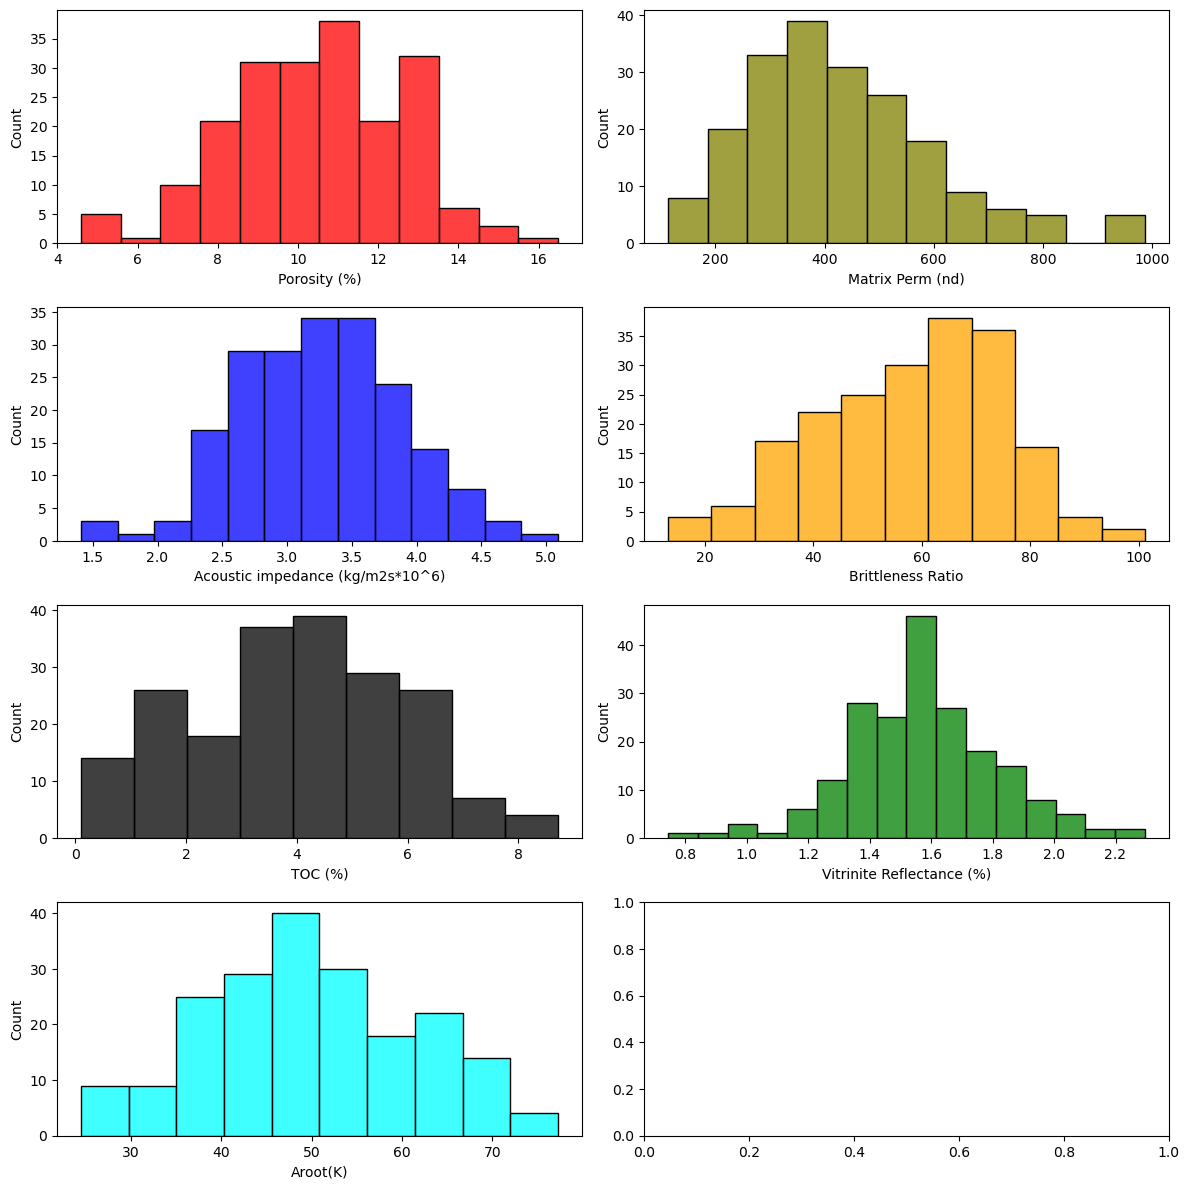

In [6]:
plt.style.use('default')
f, axes = plt.subplots(4,2, figsize=(12,12))
sns.histplot(data['Porosity (%)'], color='red', ax=axes[0,0])
sns.histplot(data['Matrix Perm (nd)'], color='olive',ax=axes[0,1])
sns.histplot(data['Acoustic impedance (kg/m2s*10^6)'], color='blue', ax=axes[1,0])
sns.histplot(data['Brittleness Ratio'], color='orange', ax=axes[1,1])
sns.histplot(data['TOC (%)'], color='black', ax=axes[2,0])
sns.histplot(data['Vitrinite Reflectance (%)'], color ='green', ax=axes[2,1])
sns.histplot(data['Aroot(K)'], color='cyan', ax=axes[3,0])

plt.tight_layout()
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

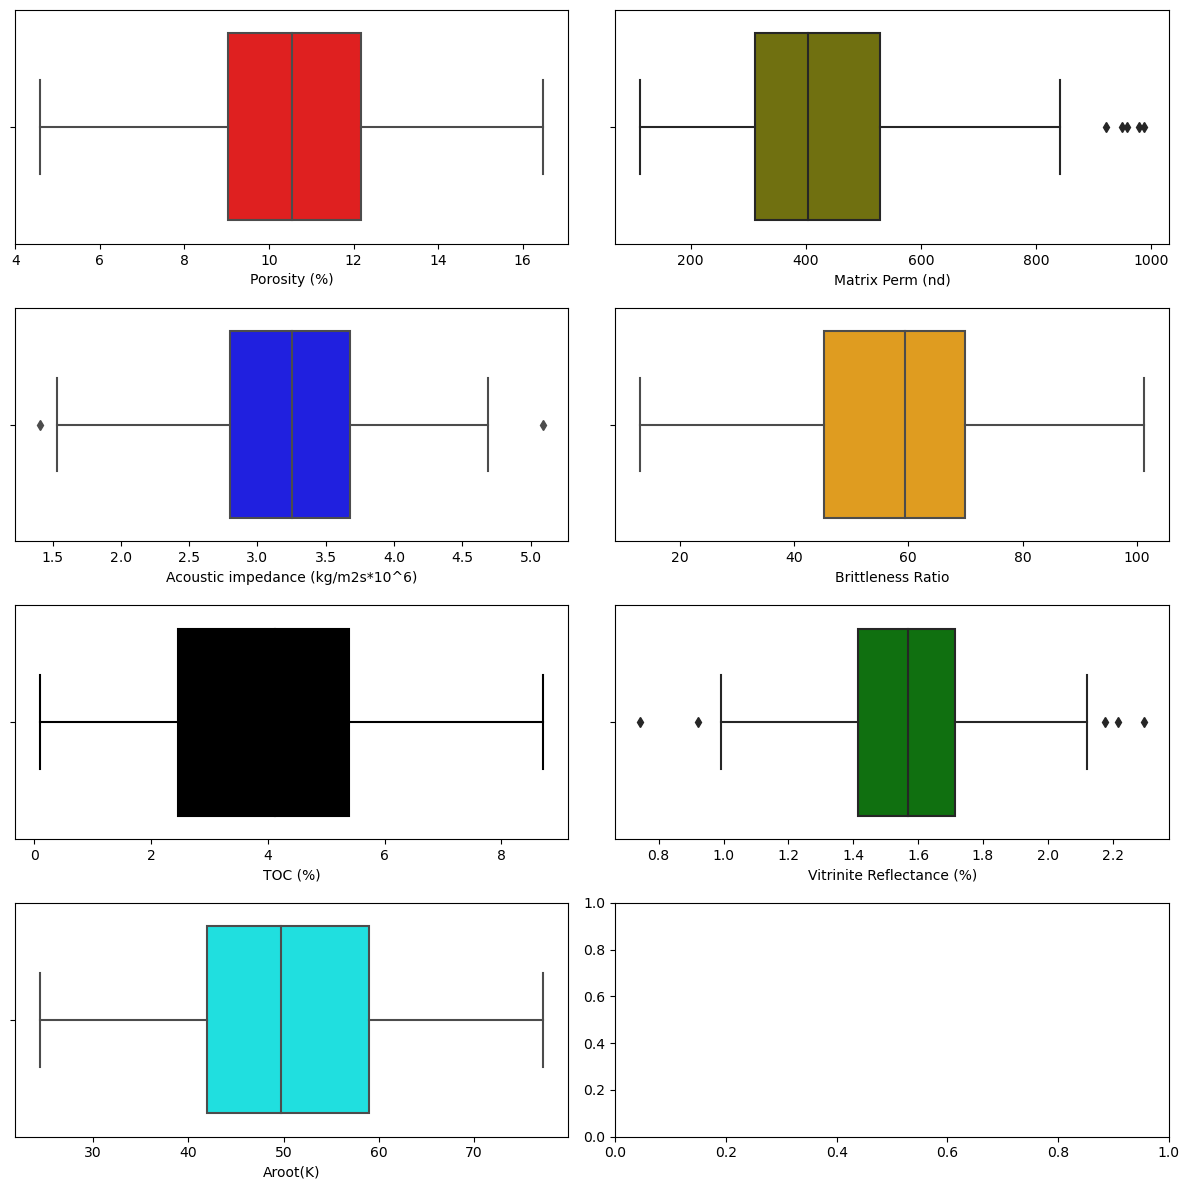

In [7]:
plt.style.use('default')
f, axes = plt.subplots(4,2, figsize=(12,12))
sns.boxplot(data['Porosity (%)'], data=data,color='red', ax=axes[0,0])
sns.boxplot(data['Matrix Perm (nd)'], color='olive',ax=axes[0,1])
sns.boxplot(data['Acoustic impedance (kg/m2s*10^6)'], color='blue', ax=axes[1,0])
sns.boxplot(data['Brittleness Ratio'], color='orange', ax=axes[1,1])
sns.boxplot(data['TOC (%)'], color='black', ax=axes[2,0])
sns.boxplot(data['Vitrinite Reflectance (%)'], color ='green', ax=axes[2,1])
sns.boxplot(data['Aroot(K)'], color='cyan', ax=axes[3,0])

plt.tight_layout()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

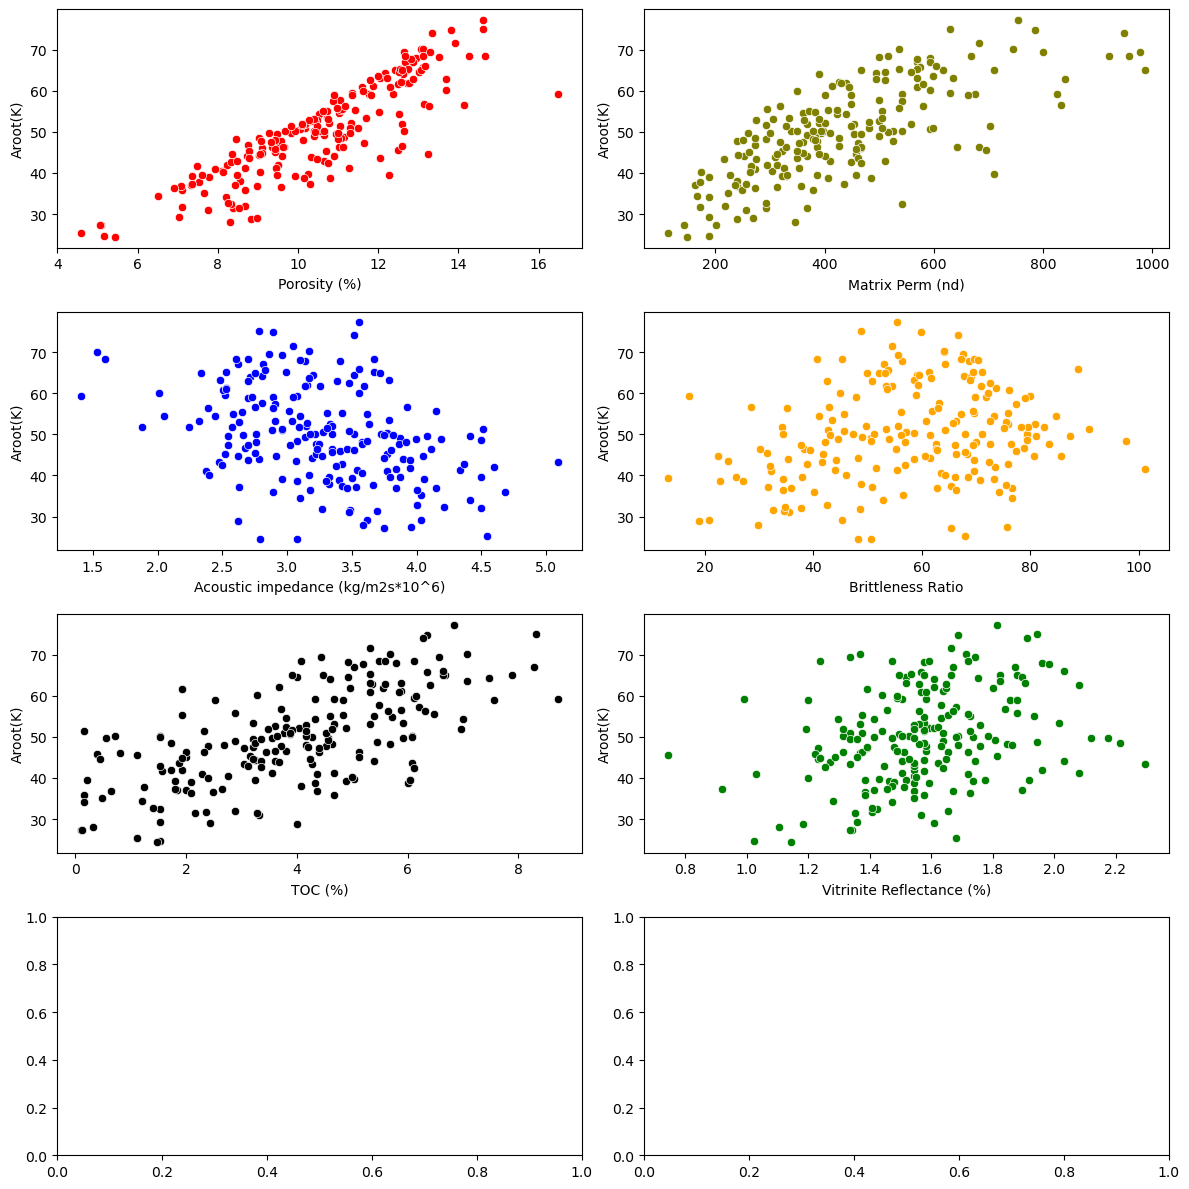

In [8]:
plt.style.use('default')
f, axes = plt.subplots(4,2, figsize=(12,12))
sns.scatterplot(data['Porosity (%)'], data['Aroot(K)'],color='red', ax=axes[0,0])
sns.scatterplot(data['Matrix Perm (nd)'], data['Aroot(K)'], color='olive',ax=axes[0,1])
sns.scatterplot(data['Acoustic impedance (kg/m2s*10^6)'], data['Aroot(K)'], color='blue', ax=axes[1,0])
sns.scatterplot(data['Brittleness Ratio'], data['Aroot(K)'], color='orange', ax=axes[1,1])
sns.scatterplot(data['TOC (%)'], data['Aroot(K)'], color='black', ax=axes[2,0])
sns.scatterplot(data['Vitrinite Reflectance (%)'], data['Aroot(K)'], color ='green', ax=axes[2,1])


plt.tight_layout()

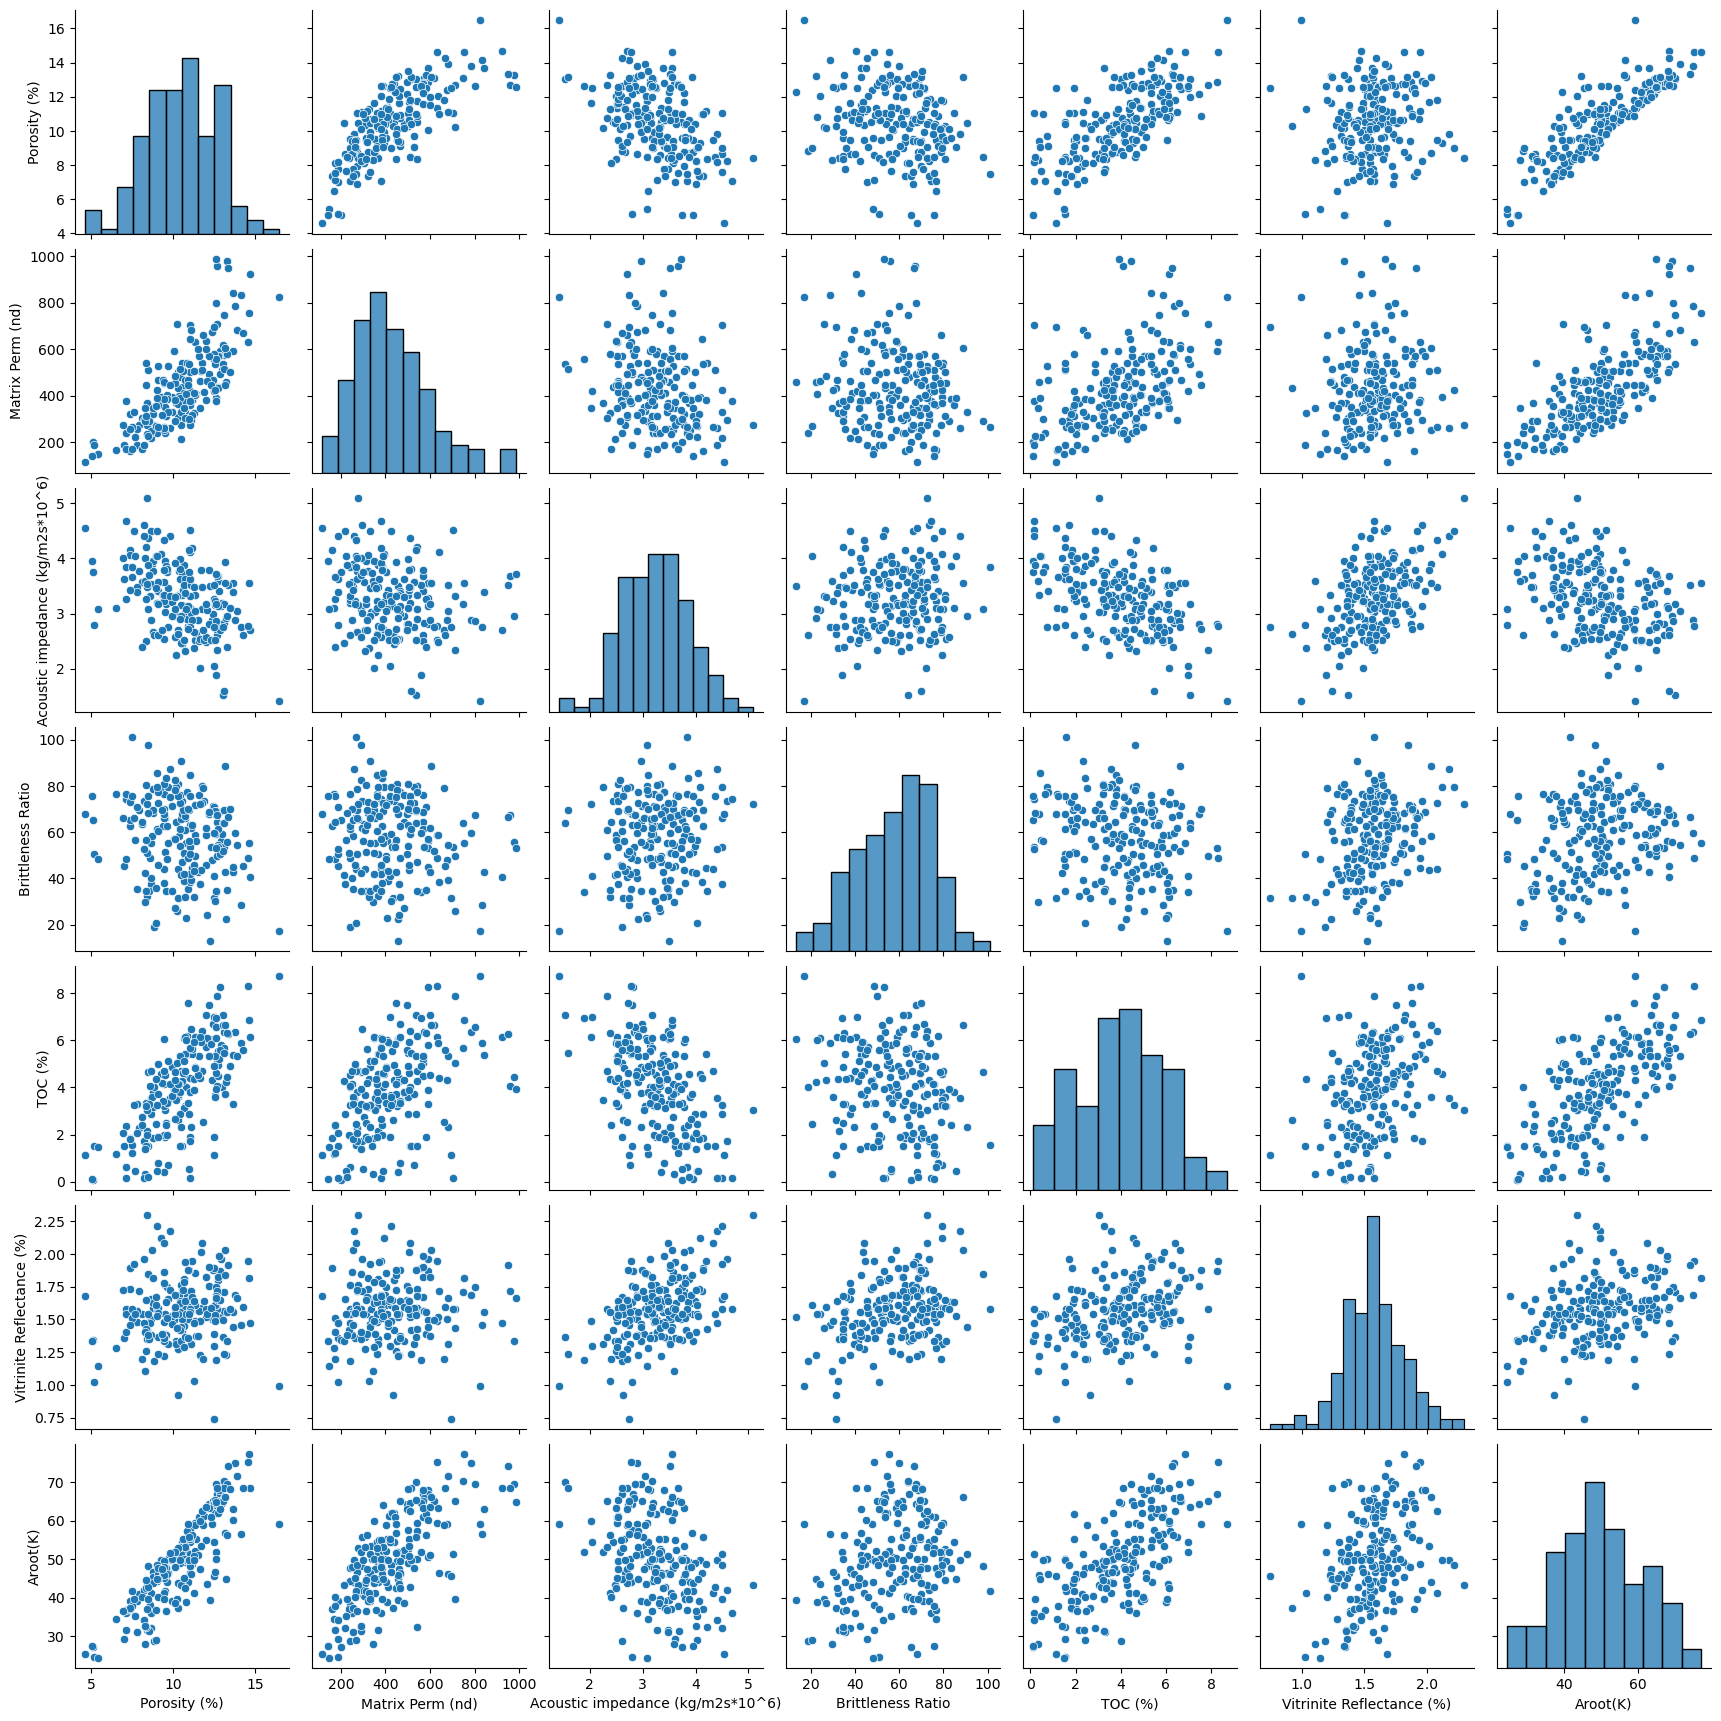

In [9]:
sns.pairplot(data)

<AxesSubplot:>

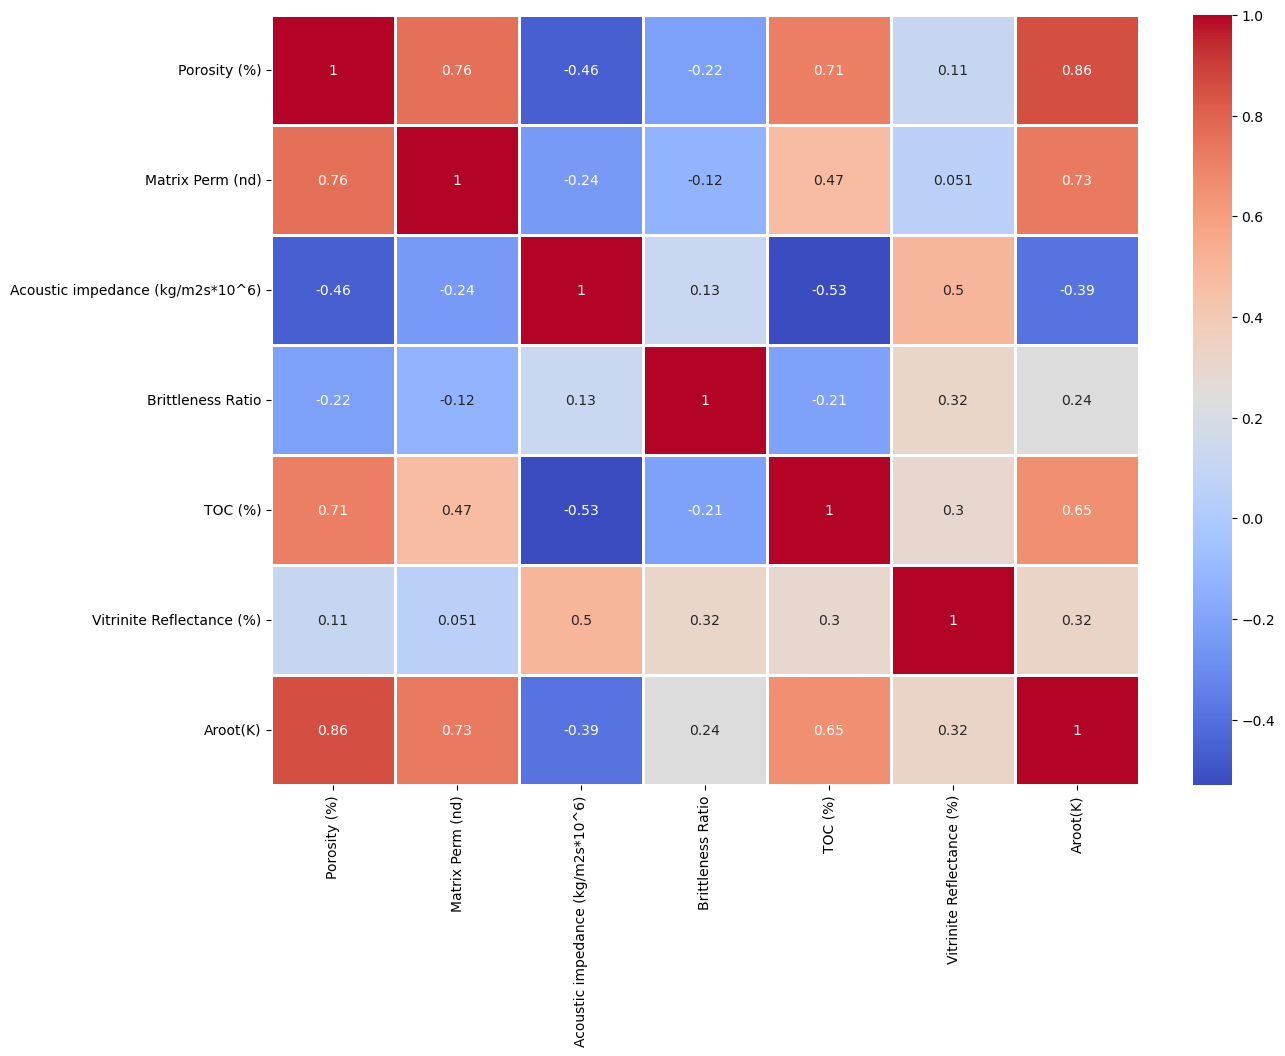

In [10]:
plt.figure(figsize=(14,10))
plt.style.use('default')
sns.heatmap(data.corr(), lw=2, annot=True, cmap='coolwarm')

In [24]:
data.drop(['TOC (%)', 'Matrix Perm (nd)'],axis=1, inplace=True)

### Preprocessing the data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data)
df_scaled = scaler.transform(data)

In [27]:
df_scaled = pd.DataFrame(df_scaled,columns=['Porosity (%)','Acoustic impedance (kg/m2*10^6)',
                                           'Brittleness Ratio', 'Vitrinite Reflectance (%)','Aroot(K)'])

In [28]:
df_scaled.head()

,Porosity (%),Acoustic impedance (kg/m2*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,0.325294,0.453731,0.960076,0.711340,0.451776
1,0.342941,0.579104,0.480038,0.489691,0.319177
2,0.439412,0.814925,0.842894,0.922680,0.477932
3,0.654118,0.402985,0.393378,0.489691,0.656690
4,0.645294,0.567164,0.000000,0.500000,0.285149


## Building The Multi-Linear Regression

In [30]:
# X = features
# Y = target

X = df_scaled.drop(['Aroot(K)'], axis=1)
Y = df_scaled['Aroot(K)']

In [31]:
X.head()

,Porosity (%),Acoustic impedance (kg/m2*10^6),Brittleness Ratio,Vitrinite Reflectance (%)
0,0.325294,0.453731,0.960076,0.711340
1,0.342941,0.579104,0.480038,0.489691
2,0.439412,0.814925,0.842894,0.922680
3,0.654118,0.402985,0.393378,0.489691
4,0.645294,0.567164,0.000000,0.500000


In [32]:
Y.head()

0    0.451776
1    0.319177
2    0.477932
3    0.656690
4    0.285149
Name: Aroot(K), dtype: float64

## Train Test split

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

## Train the model


In [36]:
lr = LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(x_test)

The intercept and coefficient of the regression

In [39]:
print(lr.intercept_)

-0.31631466704348


In [43]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])

In [44]:
coeff_df

,Coefficient
Porosity (%),1.087253
Acoustic impedance (kg/m2*10^6),-0.156872
Brittleness Ratio,0.435503
Vitrinite Reflectance (%),0.221034


The model score

In [40]:
model_score = lr.score(x_test,y_test)

In [42]:
print(model_score*100)

94.5989776106313


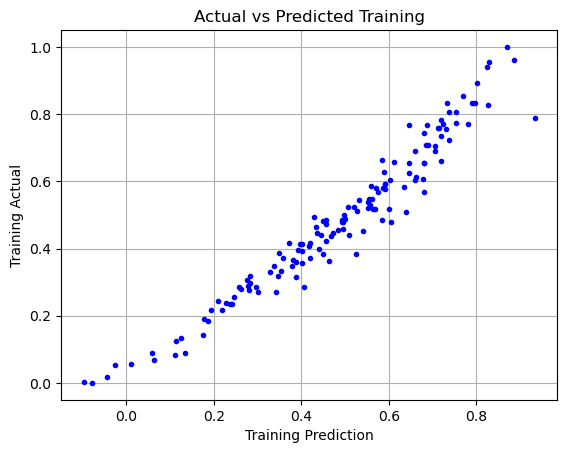

In [45]:
plt.style.use('default')
prediction = lr.predict(x_train)
plt.plot(prediction,y_train,'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual vs Predicted Training')
plt.grid()

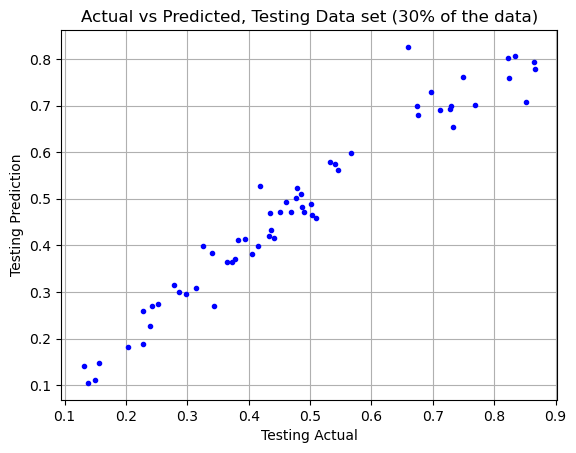

In [47]:
plt.style.use('default')

plt.plot(y_test,y_pred,'b.')
plt.ylabel('Testing Prediction')
plt.xlabel('Testing Actual')
plt.title('Actual vs Predicted, Testing Data set (30% of the data)')
plt.grid()

Checking metrics

In [48]:
from sklearn.metrics import r2_score

In [51]:
test_set_r2 = r2_score(y_test,y_pred)
print('Testing r^2:',round(test_set_r2,4))

Testing r^2: 0.946


In [52]:
train_set_r2 = r2_score(prediction,y_train)
print('Training r^2:',round(train_set_r2,4))

Training r^2: 0.9415


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Aroot(K)', ylabel='Density'>

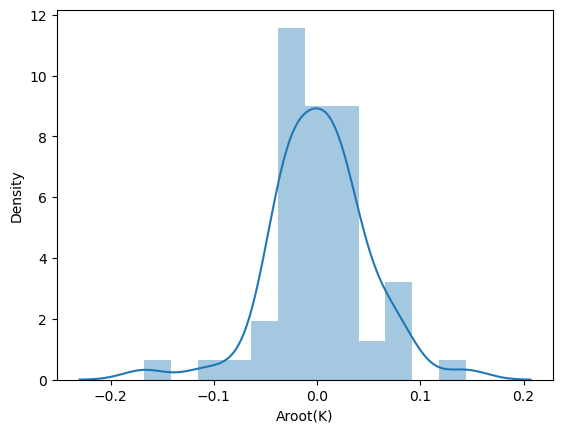

In [57]:
plt.style.use('default')
sns.distplot((y_test-y_pred))

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', round(metrics.mean_absolute_error(y_test,y_pred),5))
print('MSE:', round(metrics.mean_squared_error(y_test,y_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),5))


MAE: 0.03451
MSE: 0.00222
RMSE: 0.04711


In [60]:
import statsmodels.api as sm

In [61]:
x = sm.add_constant(x_train) # adding constant

model = sm.OLS(y_train,x).fit()
predictions = model.predict(x)

In [62]:
model_stats = model.summary()
print(model_stats)

                            OLS Regression Results                            
Dep. Variable:               Aroot(K)   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     577.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           8.44e-84
Time:                        18:12:29   Log-Likelihood:                 214.05
No. Observations:                 140   AIC:                            -418.1
Df Residuals:                     135   BIC:                            -403.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     